# Assinment 1 - Adverserial Learning

## Eitamar Saraf, Moshe Nasletashvili

### Load MNIST dataset

In [1]:
import torch
import torchvision

In [2]:
mnist_train_dataset = torchvision.datasets.MNIST(r'.\Datasets', train=True,
                                                transform=torchvision.transforms.Compose([
                                                    torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))]))
mnist_test_dataset = torchvision.datasets.MNIST(r'.\Datasets', train=False,
                                                transform=torchvision.transforms.Compose([
                                                    torchvision.transforms.ToTensor(),
                                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))]))

### Some examples

In [7]:
import matplotlib.pyplot as plt
import numpy as np

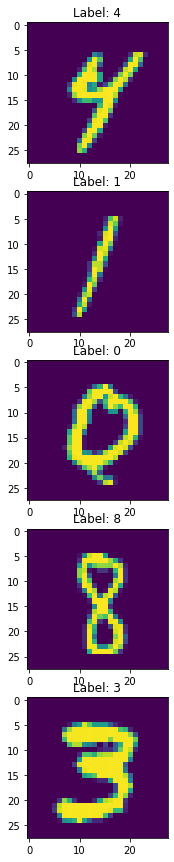

In [84]:
num_plots = 5
fig, axis = plt.subplots(nrows=num_plots, figsize=(15,15)) 
for idx, image_idx in enumerate(np.random.randint(len(mnist_train_dataset), size=num_plots)):
    axis[idx].imshow(mnist_train_dataset[image_idx][0].squeeze())
    axis[idx].set_title(f'Label: {mnist_train_dataset[image_idx][1]}')

### Defining net architecture

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class MNIST_net(nn.Module):
    
    def __init__(self):
        super(MNIST_net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.softmax(x)

### training

In [22]:
import torch.optim as optim

In [23]:
num_epochs = 15
batch_size = 64
lr = 3e-3
weight_decay = 1e-4
log_interval = 100

In [24]:
net = MNIST_net()
optimizer = optim.SGD(params=net.parameters(), lr=lr, weight_decay=weight_decay) #, momentum=0.5)

In [25]:
train_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=batch_size, shuffle=True)

In [26]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(num_epochs + 1)]
train_accuracy = []
test_accuracy = []

In [27]:
## training loop
def train(train_loader, network, optimizer, epoch, log_interval, loss_function):
    correct = 0
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            train_losses.append(loss.item())
            torch.save(network.state_dict(), r'.\results\model.pth')
            torch.save(optimizer.state_dict(), r'.\results\optimizer.pth')
    train_accuracy.append(100. * correct / len(train_loader.dataset))

In [28]:
def test(test_loader, network, epoch, log_interval):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracy.append(100. * correct / len(test_loader.dataset))
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      100. * correct / len(test_loader.dataset)))

In [30]:
for epoch in range(num_epochs):
    train(train_loader, net, optimizer, epoch, log_interval,F.nll_loss)
    test(test_loader, net, epoch, log_interval)

C:\Users\moshe.nas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Train Epoch: 0 [0/60000 (0%)]	Loss: -0.104663
Train Epoch: 0 [6400/60000 (11%)]	Loss: -0.104495
Train Epoch: 0 [12800/60000 (21%)]	Loss: -0.112855
Train Epoch: 0 [19200/60000 (32%)]	Loss: -0.123755
Train Epoch: 0 [25600/60000 (43%)]	Loss: -0.116601
Train Epoch: 0 [32000/60000 (53%)]	Loss: -0.146950
Train Epoch: 0 [38400/60000 (64%)]	Loss: -0.144278
Train Epoch: 0 [44800/60000 (75%)]	Loss: -0.166705
Train Epoch: 0 [51200/60000 (85%)]	Loss: -0.222660
Train Epoch: 0 [57600/60000 (96%)]	Loss: -0.278352


C:\Users\moshe.nas\AppData\Local\Continuum\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: -0.2752, Accuracy: 4784/10000 (48%)

Train Epoch: 1 [0/60000 (0%)]	Loss: -0.271835
Train Epoch: 1 [6400/60000 (11%)]	Loss: -0.306004
Train Epoch: 1 [12800/60000 (21%)]	Loss: -0.384948
Train Epoch: 1 [19200/60000 (32%)]	Loss: -0.369092
Train Epoch: 1 [25600/60000 (43%)]	Loss: -0.366010
Train Epoch: 1 [32000/60000 (53%)]	Loss: -0.464230
Train Epoch: 1 [38400/60000 (64%)]	Loss: -0.417647
Train Epoch: 1 [44800/60000 (75%)]	Loss: -0.540767
Train Epoch: 1 [51200/60000 (85%)]	Loss: -0.424054
Train Epoch: 1 [57600/60000 (96%)]	Loss: -0.610355

Test set: Avg. loss: -0.4978, Accuracy: 5802/10000 (58%)

Train Epoch: 2 [0/60000 (0%)]	Loss: -0.544514
Train Epoch: 2 [6400/60000 (11%)]	Loss: -0.501616
Train Epoch: 2 [12800/60000 (21%)]	Loss: -0.449423
Train Epoch: 2 [19200/60000 (32%)]	Loss: -0.416960
Train Epoch: 2 [25600/60000 (43%)]	Loss: -0.505755
Train Epoch: 2 [32000/60000 (53%)]	Loss: -0.504171
Train Epoch: 2 [38400/60000 (64%)]	Loss: -0.463194
Train Epoch: 2 [44800/60000

### Loss and Accuracy

Text(0.5, 1.0, 'Train Loss')

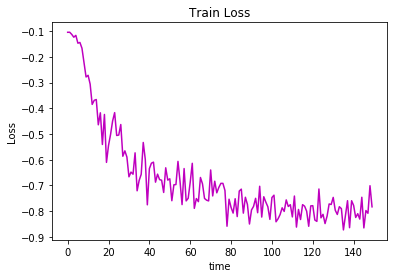

In [35]:
plt.plot(train_losses, 'm')
# plt.plot(test_losses, 'c')
# plt.legend(['train loss', 'test loss'])
plt.xlabel('time')
plt.ylabel('Loss')
plt.title('Train Loss')

Text(0.5, 1.0, 'Test Loss')

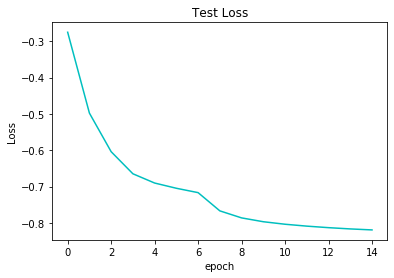

In [36]:
plt.plot(test_losses, 'c')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Test Loss')

Text(0, 0.5, 'Accuracy')

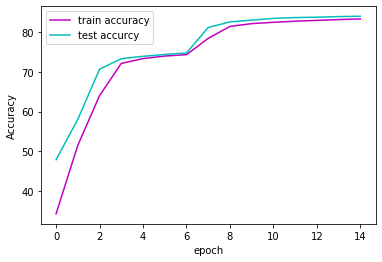

In [37]:
plt.plot(train_accuracy, 'm')
plt.plot(test_accuracy, 'c')
plt.legend(['train accuracy', 'test accurcy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [33]:
train_accuracy[-1], test_accuracy[-1]

(tensor(83.3933), tensor(84.0700))

### Finding Image Correctly Classified

In [38]:
flag = True
while flag:
    rand_idx = np.random.randint(len(test_loader.dataset))
    img, label = test_loader.dataset.__getitem__(rand_idx)
    output = net(img)
    pred = output.data.max(1, keepdim=True)[1]
    flag = (label != pred)

C:\Users\moshe.nas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


In [39]:
rand_idx

8242

Text(0.5, 1.0, 'Image index: 8242, label: 8, prediction: tensor([[8]])')

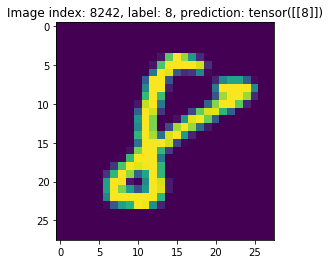

In [40]:
plt.imshow(img.squeeze())
plt.title(f'Image index: {rand_idx}, label: {label}, prediction: {pred}')

### Creating adverserial example

In [41]:
def change_value(img, label, x, y, net):
    flag = True
    count = 0
    changed_img = img.squeeze().numpy().copy()
    N = 1000
    while flag & (count < 10000):
        count += 1
        changed_img[x, y] = 200 * np.random.randn() + img[0, x,y]
        output = net(torch.tensor(changed_img))
        pred = output.data.max(1, keepdim=True)[1]
        flag = (label == pred)
    l2_diff = np.linalg.norm(changed_img - img.squeeze().numpy(), ord=2)
    l0_diff = np.sum(changed_img - img.squeeze().numpy() != 0)# / len(img.squeeze().numpy().reshape(-1))
    return changed_img, pred, l2_diff, l0_diff

C:\Users\moshe.nas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


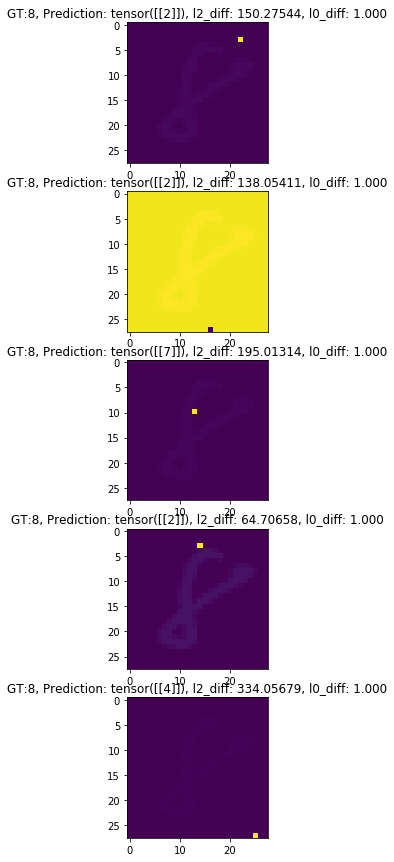

In [43]:
changed_img_list = []
changed_coordinates = []
fig, axis = plt.subplots(nrows=5, figsize=(15,15))
for i in range(5):
    x,y = np.random.randint(28, size=2)
    changed_img, pred, l2_diff, l0_diff = change_value(img, label, x, y, net)
    changed_img_list.append(changed_img)
    changed_coordinates.append((x,y))
    axis[i].imshow(changed_img)
    axis[i].set_title(f'GT:{label}, Prediction: {pred}, l2_diff: {l2_diff:.5f}, l0_diff: {l0_diff:.3f}')

### Training SVM model

In [3]:
svm_train_data = mnist_train_dataset.data.numpy().reshape(60000, -1)
svm_train_labels = mnist_train_dataset.targets.numpy()
svm_test_data = mnist_test_dataset.data.numpy().reshape(10000, -1)
svm_test_labels = mnist_test_dataset.targets.numpy()

In [4]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [5]:
clf = make_pipeline(StandardScaler(), SVC(verbose=True, gamma='auto'))
clf.fit(svm_train_data[:10000], svm_train_labels[:10000])

[LibSVM]

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=True))],
         verbose=False)

In [44]:
img = svm_test_data[8242]
clf.predict(img.reshape(1,-1))

array([8], dtype=int64)

In [48]:
clf.score(svm_train_data[:10000], svm_train_labels[:10000])

0.9807

In [49]:
clf.score(svm_test_data[:1000], svm_test_labels[:1000])

0.927

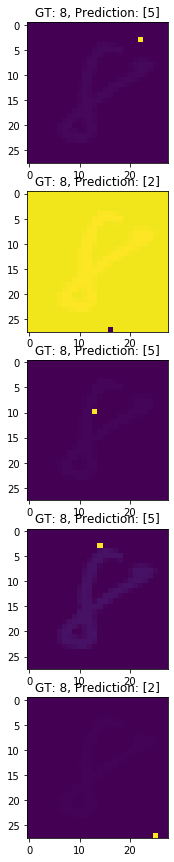

In [45]:
fig, axis = plt.subplots(nrows=5, figsize=(15,15))
for i, cha_img in enumerate(changed_img_list):
    axis[i].imshow(cha_img)
    pred = clf.predict(cha_img.reshape(1,-1))
    axis[i].set_title(f'GT: 8, Prediction: {pred}')